In [9]:
# import libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog

In [12]:
# Load network data
curr_fold = os.getcwd()
json_file = open(curr_fold + '/final_network_params/astigmatism_binary.json', "r")
loaded_model_json = json_file.read()
json_file.close()

# Create the network
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Apply parameters to the network
loaded_model.load_weights(curr_fold + '/final_network_params/astigmatism_binary.h5')

# Compile the network
loaded_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

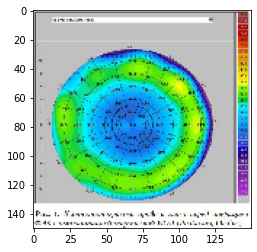

No astigmatism


In [13]:
# Testing network
root = tk.Tk()
root.withdraw()
root.wm_attributes('-topmost', 1)
img_path = filedialog.askopenfilename(initialdir = curr_fold + '/Images for testing final network')
root.destroy()
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis = 0)
plt.imshow(img)
plt.show()
prediction = loaded_model.predict(x)
prediction = round(prediction[0,0])
if prediction == 0:
  prediction = 'Astigmatism'
else:
  prediction = 'No astigmatism'
print(prediction)